In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Recordando que a $t>0$ la longitud de la cuerda del péndulo se acorta con rapidez constante $\frac{d\ell}{dt} = - \alpha$, tal que la longitud de la cuerda a un instante $t$ está dada por $\ell(t) = \ell_0 -\alpha t$.

Entonces, para poder graficar el diagrama de fase, se asignan valores arbitrarios para las condiciones iniciales del sistema, como lo son:

- La longitud inicial de la cuerda $\ell_0$
- El ángulo inicial $\theta_0$
- La velocidad angular inicial $\omega_0$

Así como otros valores necesarios como la masa de la partícula, el tiempo final $t_f = t_{max}$.

In [2]:
# Se definen las constantes
g = 9.81  # (m/s^2)
l0 = 1.0  # longitud inicial de la cuerda del péndulo (m)
m = 1.0  # masa de la partícula (kg)
theta0 = np.pi / 4  # ángulo inicial (rad)
omega0 = 0.0  # velocidad angular inicial (rad/s)
t_max = 10  # tiempo final (s)
num_points = 1000  # número de puntos en el array destinado al tiempo de simulación

# Array del tiempo, desde t_i=0 a t_f=t_max
t = np.linspace(0, t_max, num_points)

Se define una función que determina las derivadas $\dfrac{d\theta}{dt}$ y $\dfrac{d\omega}{dt}$ para un cierto estado y tiempo dados.

In [3]:
# Función para determinar las derivadas dtheta/dt y domega/dt
def derivatives(y, t, alpha):
    theta, omega = y
    l = l0 - alpha * t
    dtheta_dt = omega
    domega_dt = - (g / l) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Condiciones iniciales para theta y omega
y0 = [theta0, omega0]

# Valores de alpha para los cuales se construirán los dos diagramas de fase
alphas = [0, 0.5]

Se grafica el diagrama de fase para valores de $\alpha = 0$ y $\alpha = 0.5$

C:\Users\Jorge Luis\AppData\Roaming\Python\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


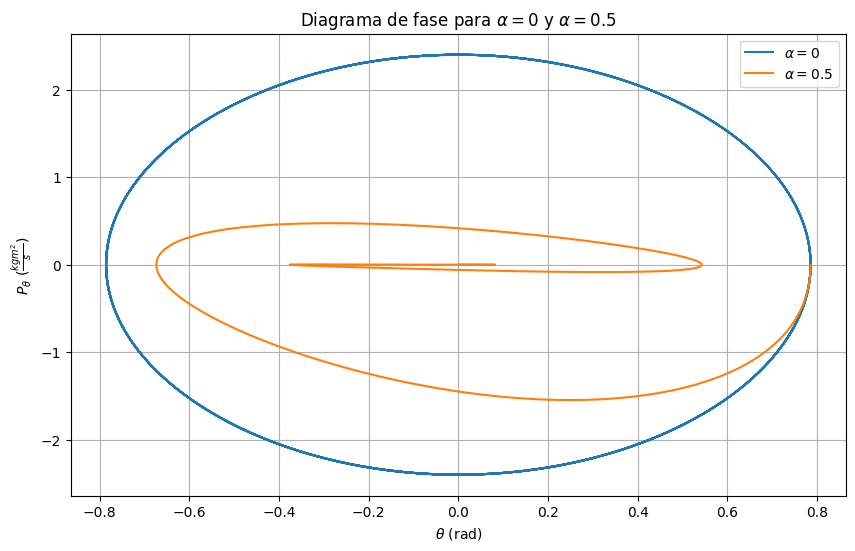

In [4]:

plt.figure(figsize=(10, 6))

for alpha in alphas:
    # Resuelve la ecuación diferencial para encontrar la solución al sistema
    sol = odeint(derivatives, y0, t, args=(alpha,))
    
    # Extrae theta y omega de la solución encontrada
    theta = sol[:, 0]
    omega = sol[:, 1]
    
    # Determina el momento P_theta
    l = l0 - alpha * t
    P_theta = m * (l ** 2) * omega
    
    # Se grafica el diagrama de fase del sistema
    plt.plot(theta, P_theta, label=r'$\alpha = $' + str(alpha))

plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$P_{\theta}$ ($\frac{kgm^2}{s}$)')
plt.title(r'Diagrama de fase para $\alpha = 0$ y $\alpha = 0.5$')
plt.legend()
plt.grid(True)
plt.show()